In [36]:
#Importing the necessary libraries


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

from matplotlib import pyplot
from sklearn.metrics import f1_score
from pprint import pprint
from IPython.display import display 
from sklearn import model_selection
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, roc_auc_score, precision_score
from sklearn.model_selection import RandomizedSearchCV

In [2]:
chunk_data=pd.read_csv("BankChurners.csv")
chunk_data

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


In [3]:
#checking the shape of data
print(chunk_data.shape)

(10127, 23)


In [4]:
#removing the column names which are having unusual numbers

columns_to_be_dropped = ['CLIENTNUM',
'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2']


In [5]:
chunk_data = chunk_data.drop(columns_to_be_dropped,errors='ignore',axis=1)
chunk_data

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [6]:
#examining the data types
chunk_data.dtypes

Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

In [7]:
chunk_data.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [8]:
print("Checking for the null values")
print(chunk_data.isnull().sum())

Checking for the null values
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64


There are no null values in the dataset

In [9]:
# checking for duplicates 
duplicates_check = len(chunk_data[chunk_data.duplicated()])
duplicates_check

0

## Exploratory Data Analysis

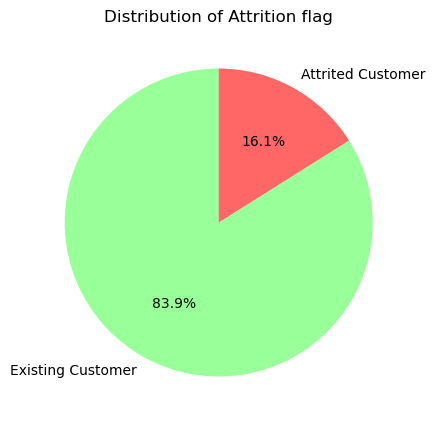

In [10]:
#Pie chart for divisions of attribition flag
counts_of_attrition = chunk_data['Attrition_Flag'].value_counts()

plt.figure(figsize=(5, 5))
plt.pie(counts_of_attrition, labels=counts_of_attrition.index, autopct='%1.1f%%', startangle=90, colors=['#99ff99', '#ff6666'])
plt.title('Distribution of Attrition flag')

# Display the pie chart
plt.show()

In the dataset, 83.9% of the customers are existing while 16.1% are attrited

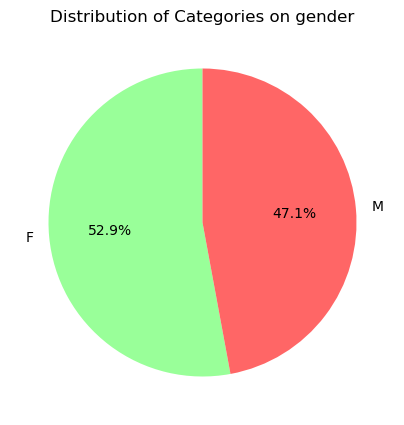

In [11]:
#Pie chart for divisions of gender
count_gender = chunk_data['Gender'].value_counts()

plt.figure(figsize=(5, 5))
plt.pie(count_gender, labels=count_gender.index, autopct='%1.1f%%', startangle=90, colors=['#99ff99', '#ff6666'])
plt.title('Distribution of Categories on gender')

# Display the pie chart
plt.show()

In the dataset, 52.9% of the customers are Females while 47.1% are males.

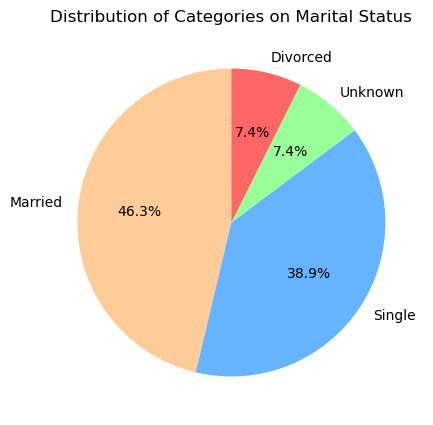

In [12]:
#Pie chart for division on maritial status
marital_status = chunk_data['Marital_Status'].value_counts()

plt.figure(figsize=(5, 5))
plt.pie(marital_status, labels=marital_status.index, autopct='%1.1f%%', startangle=90, colors=['#ffcc99', '#66b3ff', '#99ff99', '#ff6666'])
plt.title('Distribution of Categories on Marital Status')

# Display the pie chart
plt.show()

The pie chart shows the distribution of customers in the business. The pie chart shows that the majority of customers are married, which is 46.3%, Singles comprises of 38.9% of the total customers. 7.4% of the total customers are divorced and marital status of 7.4% customers id unknown

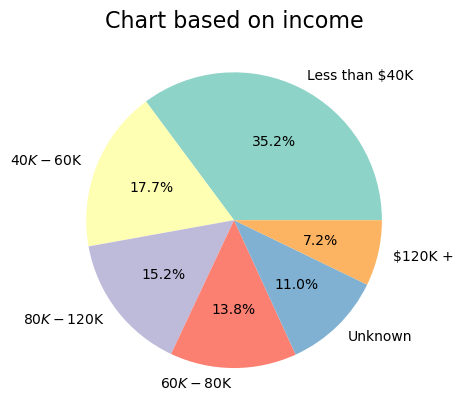

In [13]:
#Pie chart for distribution on income
income_category = chunk_data['Income_Category'].value_counts()
colors = sns.color_palette('Set3')
plt.pie(income_category, labels=income_category.index, autopct='%1.1f%%', colors=colors)
plt.title('Chart based on income', fontsize=16)
plt.show()

Majority of the customers are having an income range less than 40 thousand dollars on the other hand only 7.2 percent of the total customers are having an income range of more than 120 thousand dollars

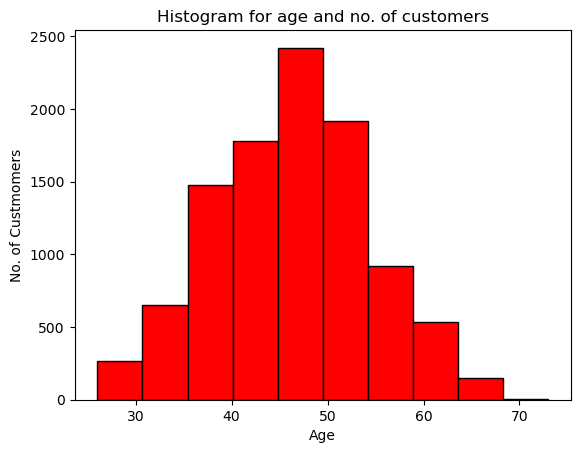

In [14]:
#Histogram for number of customers

discrete_features = chunk_data['Customer_Age']
plt.hist(discrete_features, bins=10, color='red', edgecolor='black')
plt.xlabel('Age') 
plt.ylabel('No. of Custmomers')  
plt.title('Histogram for age and no. of customers') 
plt.show()

From the histogram, it can be deduced that the maximum no. of customers are in the age group of 45 to 50

In [15]:
# encoding the string valued columns to avoid the value error

attrition_flag_enc = {'Existing Customer' : 0, 'Attrited Customer' : 1}

Gender_enc = {'M' : 0, 'F' : 1}

edu_level_enc = {'Unknown': 0, 'Uneducated': 1, 'High School': 2, 'College': 3
, 'Post-Graduate': 4, 'Graduate': 5, 'Doctorate': 6} 

Marital_Status_enc = {'Married': 0, 'Single': 1, 'Unknown': 2, 'Divorced': 3} 

income_cat_enc = {'Unknown': 0, 'Less than $40K': 1, '$40K - $60K': 2, '$60K - $80K': 3
, '$80K - $120K': 4 ,'$120K +': 5}

card_cat_enc = {'Blue': 0, 'Silver': 1, 'Gold': 2, 'Platinum': 3}

chunk_data['Attrition_Flag'] = chunk_data['Attrition_Flag'].map(attrition_flag_enc)

chunk_data['Gender'] = chunk_data['Gender'].map(Gender_enc)

chunk_data['Education_Level'] = chunk_data['Education_Level'].map(edu_level_enc)

chunk_data['Marital_Status'] = chunk_data['Marital_Status'].map(Marital_Status_enc)

chunk_data['Income_Category'] = chunk_data['Income_Category'].map(income_cat_enc)

chunk_data['Card_Category'] = chunk_data['Card_Category'].map(card_cat_enc)



chunk_data.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,45,0,3,2,0,3,0,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,0,49,1,5,5,1,1,0,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,0,51,0,3,5,0,4,0,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,0,40,1,4,2,2,1,0,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,0,40,0,3,1,0,3,0,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


### Heat map

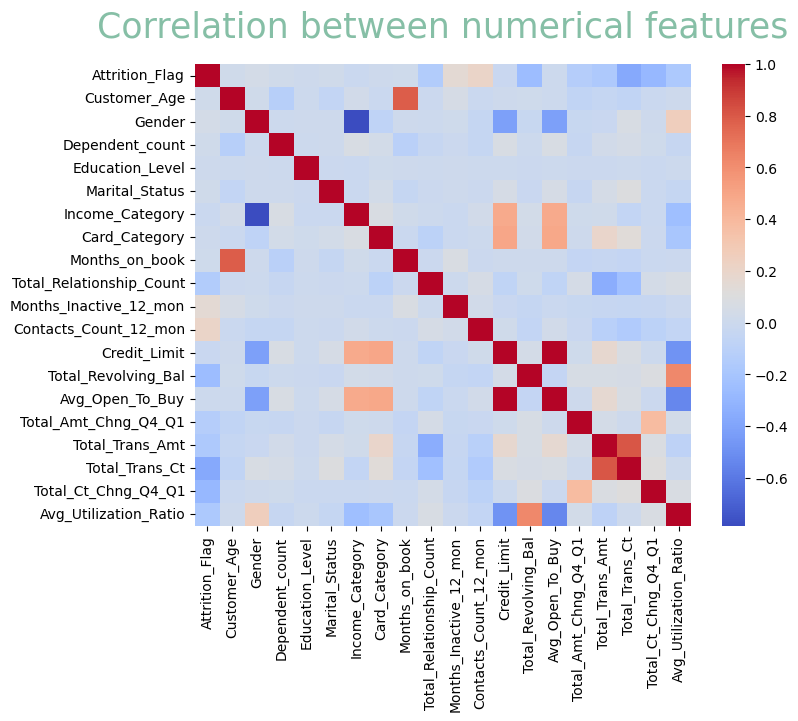

In [16]:
#Heat map for coorelation

heat_map = chunk_data.corr()
plt.figure(figsize=[8, 6])
plt.title("Correlation between numerical features", size=25, pad=20, color='#86bfa6')
sns.heatmap(heat_map, cmap='coolwarm', annot=False)
plt.show()


The variables 'Avg_Open_To_Buy' and 'Credit_Limit' exhibit a strong correlation, indicating a significant relationship between them. Similarly, 'Total_Trans_Ct' and 'Total_Trans_Amt' are closely related, suggesting a strong connection between the total transaction count and the total transaction amount.

Furthermore, it appears that 'Total_Revolving_Bal', 'Credit_Limit', and 'Avg_open_to_buy' are all interconnected with the 'Avg_Utilization_Ratio', indicating a complex relationship among these variables.

## Splitting the data to Train and Test

In [17]:
#Taking 'Attrition_Flag' as a target variable
x = chunk_data.drop(['Attrition_Flag'], axis=1)
y = chunk_data['Attrition_Flag']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

## Support Vector Classifier

In [41]:
from sklearn.svm import SVC

# Instantiate an SVM classifier
svm_classifier = SVC(random_state=42)

# Train the SVM classifier on the training data
svm_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svm_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


Accuracy: 83.86%


## KNN 

In [38]:
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier(n_neighbors=5)

knn_classifier.fit(X_train, y_train)
y_pred = knn_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

# Calculate recall
recall = recall_score(y_test, y_pred)
print("Recall: %.2f" % recall)

# Calculate precision
precision = precision_score(y_test, y_pred)
print("Precision: %.2f" % precision)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)

print(f"F1 Score: {f1:.4f}")


Accuracy: 88.99%
Recall: 0.54
Precision: 0.71
F1 Score: 0.6149


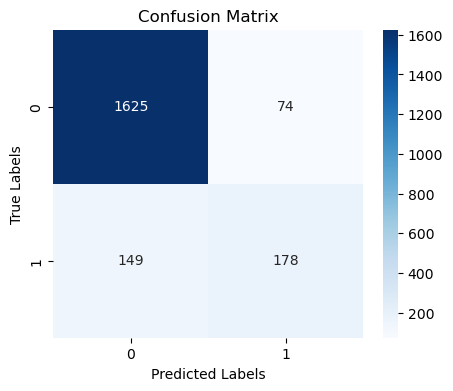

In [21]:
# Make predictions on the test set

y_pred = knn_classifier.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn and matplotlib
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

KNN has a higher accuracy than Support Vector Classifier for the given dataset and the confusion matrix for KNN shows that the model is very good at predicting the correct class for both positive and negative examples. There are very few false positives and false negatives.

## Decision Tree classifier

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Instantiate a Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the Decision Tree classifier on the training data
dt_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = dt_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Decision Tree Accuracy: %.2f%%" % (accuracy * 100.0))

# Calculate recall
recall = recall_score(y_test, y_pred)
print("Recall: %.2f" % recall)

# Calculate precision
precision = precision_score(y_test, y_pred)
print("Precision: %.2f" % precision)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)

print(f"F1 Score: {f1:.4f}")


Decision Tree Accuracy: 93.34%
Recall: 0.79
Precision: 0.79
F1 Score: 0.7933


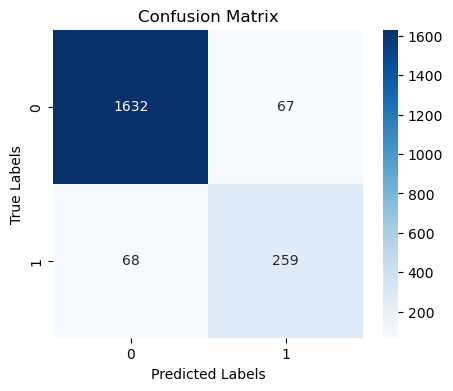

In [23]:
# Make predictions on the test set

y_pred = dt_classifier.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


The decision tree has an accuracy of 93.34%, which is higher than the KNN and Support Vector Classifier models. The confusion matrix for the decision tree shows that the model is very good at predicting the correct class for both positive and negative examples. There are very few false positives and false negatives. 

## RandomForestClassifier

In [42]:
Random_Forest_Classifier = RandomForestClassifier(random_state = 42)
Random_Forest_Classifier.fit(X_train,y_train)
print("Accuracy: %.2f%%" % ((Random_Forest_Classifier.score(X_test,y_test))*100.0))
y_pred = Random_Forest_Classifier.predict(X_test)

# Calculate recall
recall = recall_score(y_test, y_pred)
print("Recall: %.2f" % recall)

# Calculate precision
precision = precision_score(y_test, y_pred)
print("Precision: %.2f" % precision)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)

print(f"F1 Score: {f1:.4f}")

Accuracy: 96.10%
Recall: 0.82
Precision: 0.93
F1 Score: 0.8720


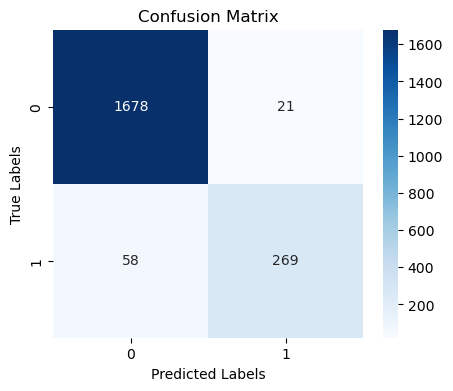

In [25]:
# Make predictions on the test set

y_pred = Random_Forest_Classifier.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn and matplotlib
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

The recall of the random forest model is 0.82. This means that the model is able to correctly identify 82% of the positive examples.

The precision of the random forest model is 0.93. This means that 93% of the examples that the model predicts as positive are actually positive.

The confusion matrix for the random forest model shows that the model is very good at predicting the correct class for both positive and negative examples. There are very few false positives and false negatives.



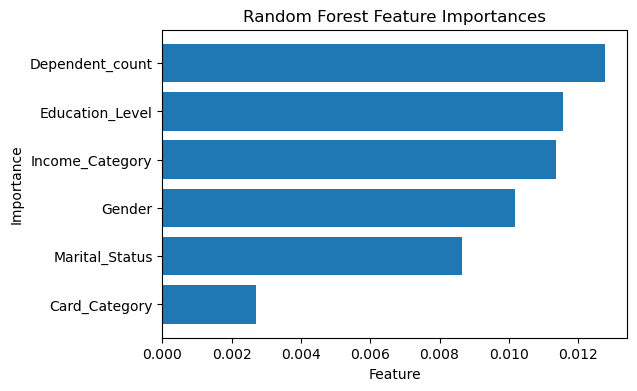

In [26]:
# Access feature importances
feature_importances = Random_Forest_Classifier.feature_importances_

# Sort indices in descending order
indices = np.argsort(feature_importances)[::1]

# Limit to the top 6 features
top_indices = indices[:6]

# Plot feature importances
plt.figure(figsize=(6, 4))
plt.barh(range(len(top_indices)), feature_importances[top_indices], align="center")
plt.yticks(range(len(top_indices)), X_train.columns[top_indices])
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Random Forest Feature Importances")
plt.show()


The figure shows that the dependent count is the most important feature for predicting customer churn. This is likely because customers with more dependents are more likely to be financially stressed and therefore more likely to churn. The education level and income category features are also important, as customers with higher education levels and incomes are more likely to be able to afford to pay their bills and are therefore less likely to churn. The gender, marital status, and card category features are less important, but they still play a role in predicting customer churn.

## XGboost 

In [43]:
import xgboost as xgb

# Instantiate an XGBoost classifier
xgb_classifier = xgb.XGBClassifier(random_state=42)

# Train the XGBoost classifier on the training data
xgb_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = xgb_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

# Calculate recall
recall = recall_score(y_test, y_pred)
print("Recall: %.2f" % recall)

# Calculate precision
precision = precision_score(y_test, y_pred)
print("Precision: %.2f" % precision)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)

print(f"F1 Score: {f1:.4f}")

Accuracy: 96.54%
Recall: 0.88
Precision: 0.91
F1 Score: 0.8913


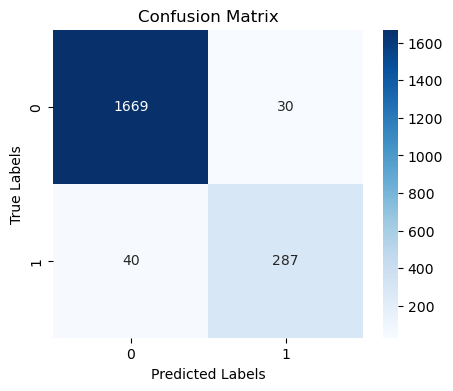

In [28]:
# Make predictions on the test set

y_pred = xgb_classifier.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn and matplotlib
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

The XGBoost model has an accuracy of 96.54%, which is slightly higher than the random forest model. This means that the XGBoost model is the best at predicting the correct class for new examples.

The recall of the XGBoost model is 0.88. This means that the model is able to correctly identify 88% of the positive examples.

The precision of the XGBoost model is 0.91. This means that 91% of the examples that the model predicts as positive are actually positive.

The confusion matrix for the XGBoost model shows that the model is very good at predicting the correct class for both positive and negative examples. There are very few false positives and false negatives.



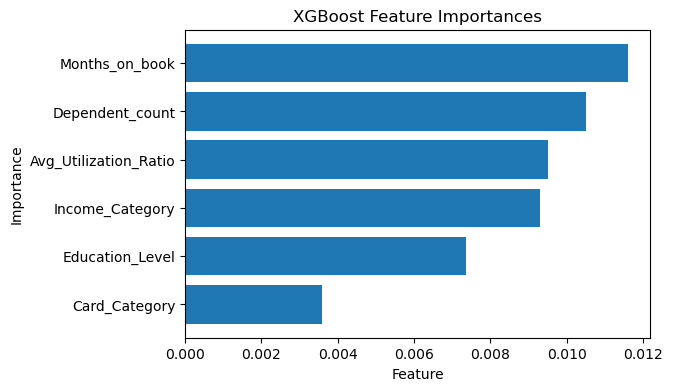

In [29]:
# Access feature importances
feature_importances = xgb_classifier.feature_importances_

# Sort indices in descending order
indices = np.argsort(feature_importances)[::1]

# Limit to the top 6 features
top_indices = indices[:6]

plt.figure(figsize=(6, 4))
plt.barh(range(len(top_indices)), feature_importances[top_indices], align="center")
plt.yticks(range(len(top_indices)), X_train.columns[top_indices])
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("XGBoost Feature Importances")
plt.show()


The figure shows that the months on book feature the most important feature, as customers who have been with the company for a longer period of time are less likely to churn. Dependent count is also important feature for predicting customer churn. This is likely because customers with more dependents are more likely to be financially stressed and therefore more likely to churn. . The income category, card category, education level, and average utilization ratio features are less important, but they still play a role in predicting customer churn.

## Comparing the accuracies of all the above models

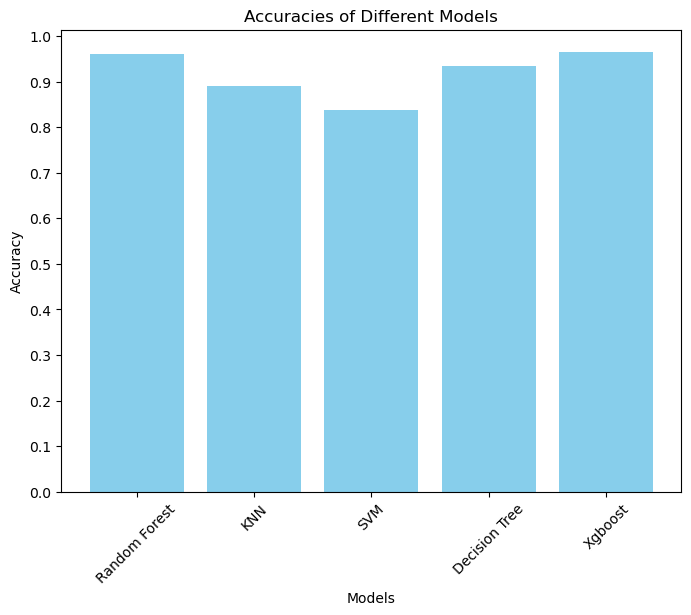

In [30]:
import matplotlib.pyplot as plt

model_accuracies = {
    "Random Forest": 0.961,
    "KNN": 0.8899,
    "SVM": 0.8386,
    "Decision Tree": 0.9334,
    "Xgboost":0.9654
}

# Extracting model names and accuracies
model_names = list(model_accuracies.keys())
accuracies = list(model_accuracies.values())

# Creating a bar graph
plt.figure(figsize=(8, 6))
plt.bar(model_names, accuracies, color='skyblue')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracies of Different Models')
# Set y-axis ticks in 0.05 increments
plt.yticks([i/20 for i in range(21)])
plt.yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()


The figure shows that all four models are good at predicting customer churn. However, the XGBoost and Random Forest Classifier models have the highest accuracies, which means that they are the best models to use for predicting customer churn.

## Hyperparameter Tuning for XGBoost Classifier 

In [31]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.05]
}

# Instantiate an XGBoost classifier
xgb_classifier = xgb.XGBClassifier(random_state=42)

# Instantiate GridSearchCV with the classifier and parameter grid
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, cv=3)

# Perform grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and the corresponding model
best_params = grid_search.best_params_
best_xgb_classifier = grid_search.best_estimator_

# Make predictions on the test data using the best model
y_pred = best_xgb_classifier.predict(X_test)

# Calculate accuracy, recall, and precision
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print("Best Parameters:", best_params)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Recall: %.2f" % recall)
print("Precision: %.2f" % precision)


Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300}
Accuracy: 96.79%
Recall: 0.89
Precision: 0.91


Hyperparameters are parameters that control the learning process of the model. By tuning these hyperparameters, it is possible to improve the accuracy of the model. In this case of the XGBoost model, the accuracy increased from 96.54% to 96.79% after hyperparameter tuning, this shows that we were successful in improving the model accuracy